In [1]:
%matplotlib inline
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from matplotlib import cm
from python_speech_features import mfcc

In [2]:
data_dir = '/home/aparnami/Research/KeywordSpotting/Few-Shot KWS/data/speech_commands/core'
keywords = list(filter(lambda x : os.path.isdir(os.path.join(data_dir,x)),os.listdir(data_dir)))

In [3]:
def get_random_wav(keyword):
     wavs = os.listdir(os.path.join(data_dir, keyword))
     random_wav = random.choice(wavs)
     return os.path.join(data_dir, keyword, random_wav)

In [4]:
keyword = random.choice(keywords)
file = get_random_wav(keyword)
rate, sig = wav.read(file)
mfcc_feat = mfcc(sig, rate)
mfcc_data = np.swapaxes(mfcc_feat, 0 ,1)

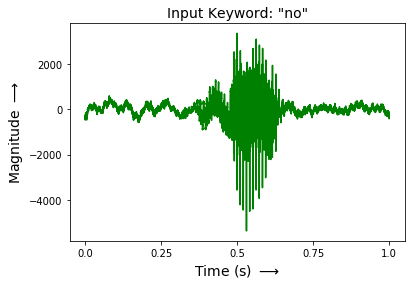

In [7]:
fig = plt.figure()
plt.plot(sig, color='g')
plt.ylabel(r'Magnitude $\longrightarrow$', fontsize=14)
plt.xlabel(r'Time (s) $\longrightarrow$' , fontsize=14)
plt.title('Input Keyword: "{}"'.format(keyword), fontsize=14)
locs = np.linspace(0,16000,5)
labels = [str(x) for x in np.linspace(0,1,5)]
locs, labels = plt.xticks(locs, labels)
plt.savefig('signal.png', bbox_inches = "tight")

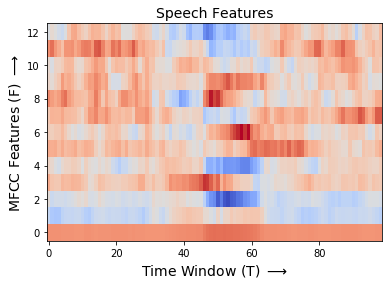

In [8]:
fig = plt.figure()
plt.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
plt.ylabel(r'MFCC Features (F) $\longrightarrow$', fontsize=14)
plt.xlabel(r'Time Window (T) $\longrightarrow$' , fontsize=14)
plt.title('Speech Features', fontsize=14)
fig.savefig('features.png', bbox_inches = "tight")